In [31]:
import treecorr as tc
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

In [32]:
cmass = np.load('../catalogue/cmass_z_cut.npy')
random = np.load('../catalogue/random_cmass.npy')
Nd = len(cmass)
Nr = len(random)

In [33]:
import astropy.units as u
from astropy.cosmology import Planck18 as cosmos
import astropy.coordinates as coo
z = 1.69
h = cosmos.H0.to(u.km/u.s/u.Mpc).value / 100
d_A = cosmos.angular_diameter_distance(z).to(u.Mpc).value
chi_l = d_A*(1+z)
Nbins = 15
r_bins = np.geomspace(3, 100, Nbins+1)        # unit: cMpc/h
theta_bins = r_bins/h/(1+z)/d_A

In [34]:
D = tc.Catalog(ra=cmass['ra'], dec=cmass['dec'], ra_units='deg', dec_units='deg', w=cmass['w'], npatch=100)
R = tc.Catalog(ra=random['ra'], dec=random['dec'], ra_units='deg', dec_units='deg', w=random['w'])

In [35]:
config = {'metric': 'Arc', 'max_sep': theta_bins[-1], 'min_sep': theta_bins[0], 'nbins':15, 'sep_units': 'rad', 'var_method':'jackknife'}
DD = tc.NNCorrelation(config=config)
DR = tc.NNCorrelation(config=config)
RR = tc.NNCorrelation(config=config)

DD.process(D)
DR.process(D, R)
RR.process(R)

In [36]:
xi, var_xi = DD.calculateXi(dr=DR, rr=RR)

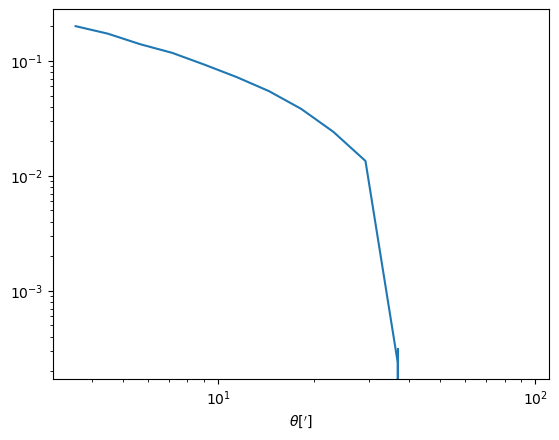

In [37]:
plt.errorbar((np.exp(DD.logr)*u.rad).to(u.arcmin), xi, var_xi)
plt.loglog()
plt.xlabel('$\\theta[\']$')
plt.savefig('./fig/w_theta_old')

pixelize

In [42]:
Nside = 1024
pix = hp.ang2pix(Nside, np.radians(90 - cmass['dec']), np.radians(cmass['ra']))

theta, phi = hp.pix2ang(Nside, pix)
new_ra = np.rad2deg(phi)
new_dec = 90 - np.rad2deg(theta)
D = tc.Catalog(ra=new_ra, dec=new_dec, ra_units='deg', dec_units='deg', w=cmass['w'], npatch=100)

In [51]:
pix = hp.ang2pix(Nside, np.radians(90 - random['dec']), np.radians(random['ra']))

theta, phi = hp.pix2ang(Nside, pix)
new_ra = np.rad2deg(phi)
new_dec = 90 - np.rad2deg(theta)
R = tc.Catalog(ra=new_ra, dec=new_dec, ra_units='deg', dec_units='deg', w=random['w'])

In [52]:
config = {'metric': 'Arc', 'max_sep': theta_bins[-1], 'min_sep': theta_bins[0], 'nbins':15, 'sep_units': 'rad', 'var_method':'jackknife'}
DD = tc.NNCorrelation(config=config)
DR = tc.NNCorrelation(config=config)
RR = tc.NNCorrelation(config=config)

DD.process(D)
DR.process(D, R)
RR.process(R)

In [53]:
xi, var_xi = DD.calculateXi(dr=DR, rr=RR)

Text(0.5, 0, "$\\theta[']$")

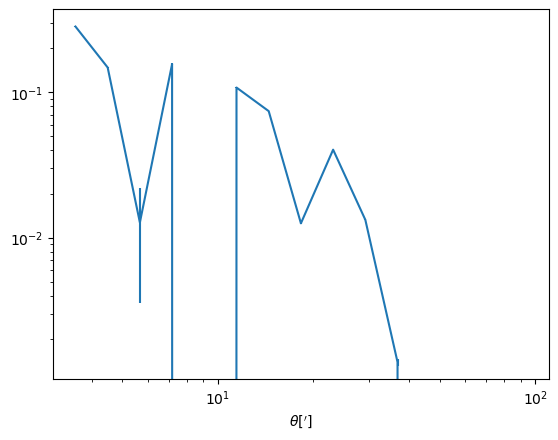

In [54]:
plt.errorbar((np.exp(DD.logr)*u.rad).to(u.arcmin), xi, var_xi)
plt.loglog()
plt.xlabel('$\\theta[\']$')
# plt.savefig('./fig/w_theta_old')